### Приклад 1. Функція `np.linalg.solve()` розв'язує систему $A\mathbf{x} = \mathbf{b}$ чисельно

In [ ]:
import numpy as np

# Система: 2x₁ + 3x₂ = 8
#          x₁ - x₂ = 1

A = np.array([
    [2, 3],
    [1, -1]
])

b = np.array([8, 1])

print("Матриця коефіцієнтів A:")
print(A)
print(f"\nВектор правої частини b: {b}")

# Розв'язуємо систему
x = np.linalg.solve(A, b)

print(f"\nРозв'язок системи x: {x}")
print(f"  x₁ = {x[0]}")
print(f"  x₂ = {x[1]}")

# Перевірка: A @ x має дорівнювати b
result = A @ x
print(f"\nПеревірка A @ x = {result}")

Матриця коефіцієнтів A:
[[ 2  3]
 [ 1 -1]]

Вектор правої частини b: [8 1]

Розв'язок системи x: [2.2 1.2]
  x₁ = 2.2
  x₂ = 1.2

Перевірка A @ x = [8. 1.]


### Приклад 2. Велика система

In [ ]:
import numpy as np

# Система з 4 рівнянь і 4 невідомих
A = np.array([
    [2, 1, -1, 3],
    [1, 3, 2, -1],
    [3, -1, 1, 2],
    [1, 2, 3, 1]
])

b = np.array([7, 8, 5, 10])

x = np.linalg.solve(A, b)

print(f"\nРозв'язок:")
for i, val in enumerate(x, 1):
    print(f"  x_{i} = {val:.4f}")

# Перевірка
solution_error = A @ x - b
print(f"\nПохибка розв'язку: {np.linalg.norm(solution_error):.2e}")


Розв'язок:
  x_1 = 1.0000
  x_2 = 2.0000
  x_3 = 1.2000
  x_4 = 1.4000

Похибка розв'язку: 0.00e+00


### Приклад 3. Обробка помилки для несумісної системи

In [ ]:
import numpy as np

# Несумісна система
A_inconsistent = np.array([
    [1, 1],
    [1, 1]
])

b_inconsistent = np.array([2, 3])

try:
    x = np.linalg.solve(A_inconsistent, b_inconsistent)
    print(f"Розв'язок: {x}")
except np.linalg.LinAlgError as e:
    print(f"\nПомилка: {e}")
    print("Система не має розв'язку або матриця вироджена")


Помилка: Singular matrix
Система не має розв'язку або матриця вироджена


### Приклад 4. Розв'язок системи х двох рівнянь

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Матриця коефіцієнтів та вектор правої частини
A = np.array([
    [2, 1],
    [1, -1]
])
b = np.array([5, 1])

# Розв'язуємо систему
x_solution = np.linalg.solve(A, b)
print(f"Розв'язок системи: x₁ = {x_solution[0]:.2f}, x₂ = {x_solution[1]:.2f}")


Розв'язок системи: x₁ = 2.00, x₂ = 1.00


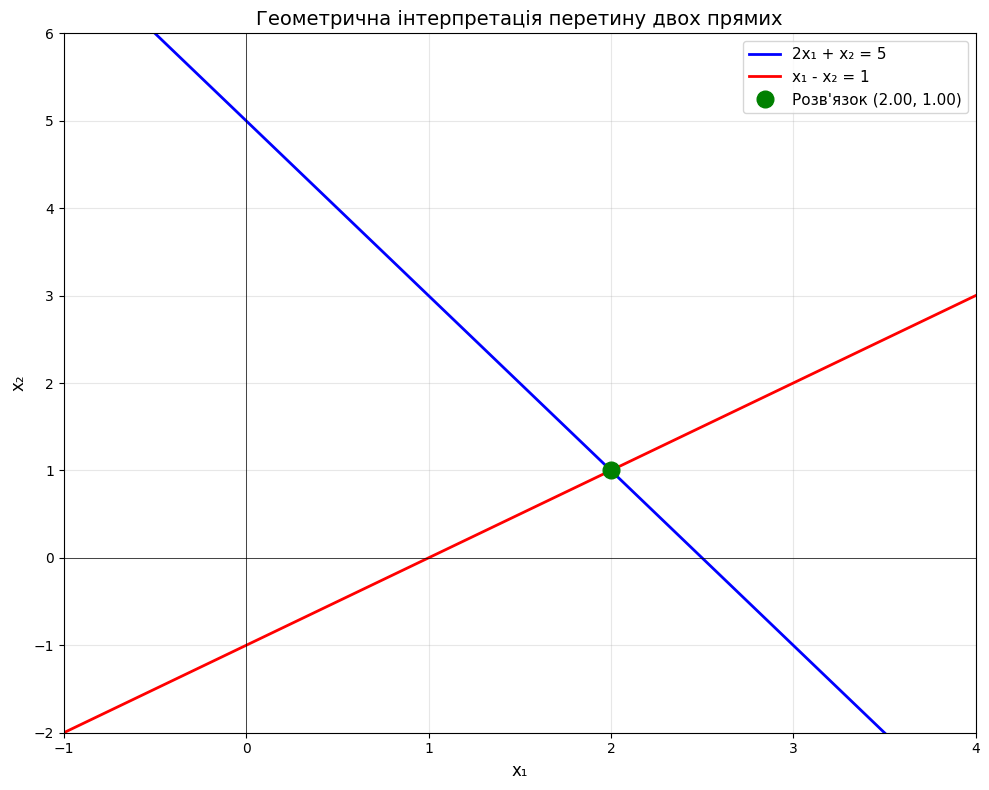

In [ ]:
# Візуалізація
# Для візуалізації створюємо діапазон значень x₁
x1_range = np.linspace(-1, 4, 400)

# Перше рівняння: 2x₁ + x₂ = 5  =>  x₂ = 5 - 2x₁
x2_line1 = 5 - 2 * x1_range

# Друге рівняння: x₁ - x₂ = 1  =>  x₂ = x₁ - 1
x2_line2 = x1_range - 1

plt.figure(figsize=(10, 8))

# Малюємо прямі
plt.plot(x1_range, x2_line1, 'b-', linewidth=2, label='2x₁ + x₂ = 5')
plt.plot(x1_range, x2_line2, 'r-', linewidth=2, label='x₁ - x₂ = 1')

# Малюємо точку розв'язку
plt.plot(x_solution[0], x_solution[1], 'go', markersize=12,
         label=f'Розв\'язок ({x_solution[0]:.2f}, {x_solution[1]:.2f})')

plt.xlim(-1, 4)
plt.ylim(-2, 6)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.xlabel('x₁', fontsize=12)
plt.ylabel('x₂', fontsize=12)
plt.title('Геометрична інтерпретація перетину двох прямих', fontsize=14)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

### Приклад 5. Коли система рівнянь не має єдиного розв’язку

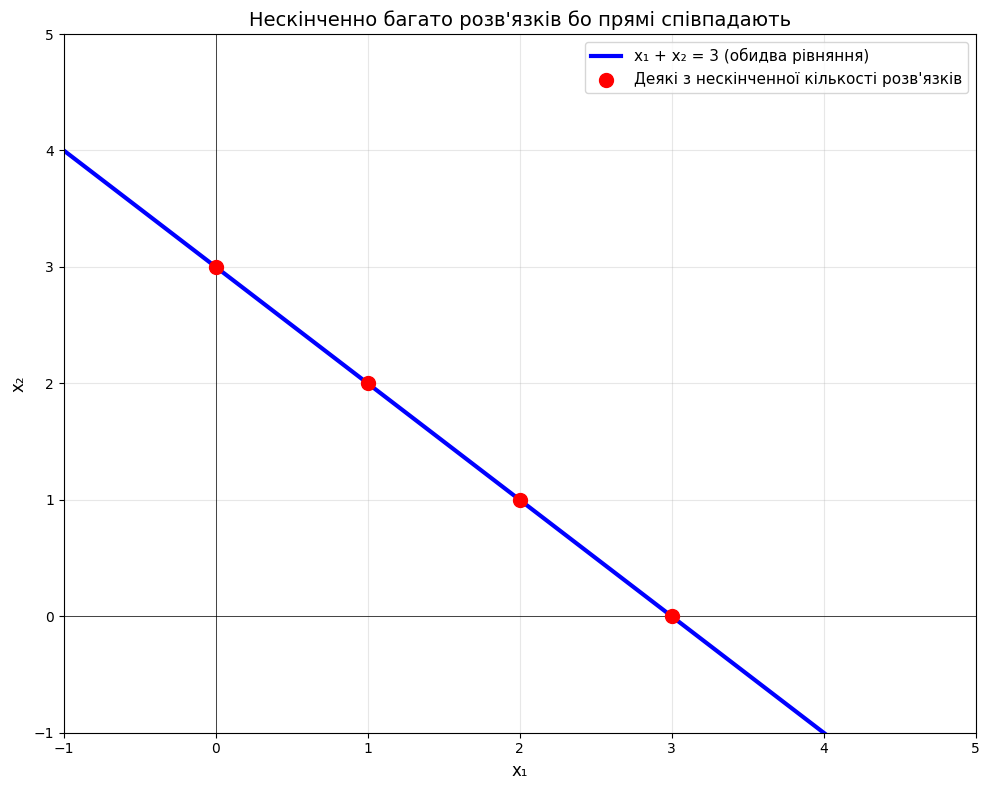

Система має нескінченно багато розв'язків
Будь-яка точка (x₁, x₂), де x₂ = 3 - x₁, є розв'язком


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Створюємо діапазон для візуалізації
x1_vals = np.linspace(-1, 5, 400)

# Обидва рівняння дають одну пряму: x₂ = 3 - x₁
x2_line = 3 - x1_vals

plt.figure(figsize=(10, 8))

# Малюємо одну пряму (обидва рівняння описують її)
plt.plot(x1_vals, x2_line, 'b-', linewidth=3, label='x₁ + x₂ = 3 (обидва рівняння)')

# Виділяємо кілька точок-розв'язків
sample_points = np.array([[0, 3], [1, 2], [2, 1], [3, 0]])
plt.scatter(sample_points[:, 0], sample_points[:, 1], c='red', s=100,
           zorder=5, label='Деякі з нескінченної кількості розв\'язків')

plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.xlabel('x₁', fontsize=12)
plt.ylabel('x₂', fontsize=12)
plt.title('Нескінченно багато розв\'язків бо прямі співпадають', fontsize=14)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print("Система має нескінченно багато розв'язків")
print("Будь-яка точка (x₁, x₂), де x₂ = 3 - x₁, є розв'язком")

### Приклад 6. Коли система взагалі не має розв’язку

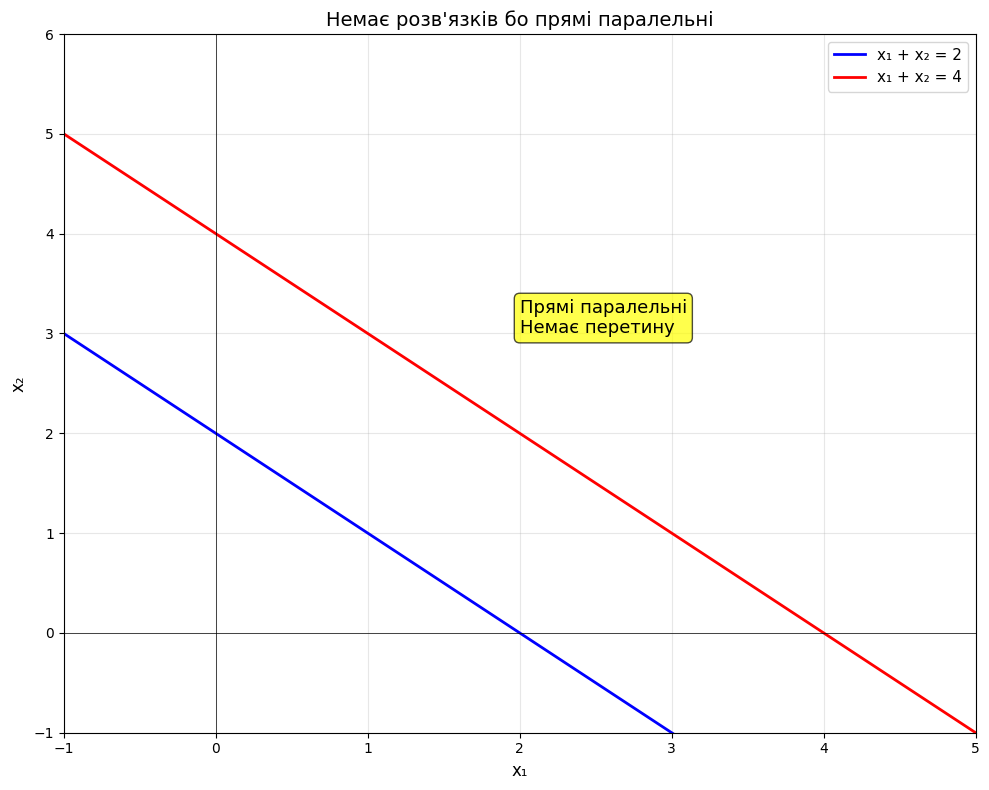

Система несумісна — розв'язку не існує
Прямі паралельні і ніколи не перетинаються


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Несумісна система (паралельні прямі):
# x₁ + x₂ = 2
# x₁ + x₂ = 4

# Діапазон для візуалізації
x1_vals = np.linspace(-1, 5, 400)

# Перша пряма: x₂ = 2 - x₁
x2_line1 = 2 - x1_vals

# Друга пряма: x₂ = 4 - x₁
x2_line2 = 4 - x1_vals

plt.figure(figsize=(10, 8))

# Малюємо паралельні прямі
plt.plot(x1_vals, x2_line1, 'b-', linewidth=2, label='x₁ + x₂ = 2')
plt.plot(x1_vals, x2_line2, 'r-', linewidth=2, label='x₁ + x₂ = 4')

# Додаємо текст про відсутність розв'язку
plt.text(2, 3, 'Прямі паралельні\nНемає перетину',
         fontsize=13, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.xlim(-1, 5)
plt.ylim(-1, 6)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.xlabel('x₁', fontsize=12)
plt.ylabel('x₂', fontsize=12)
plt.title('Немає розв\'язків бо прямі паралельні', fontsize=14)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print("Система несумісна — розв'язку не існує")
print("Прямі паралельні і ніколи не перетинаються")

### Приклад 7. Три площини

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Система трьох рівнянь з трьома невідомими
A_3d = np.array([
    [1, 1, 1],
    [2, -1, 1],
    [1, 2, -1]
])
b_3d = np.array([6, 3, 2])

# Розв'язуємо систему
x_sol_3d = np.linalg.solve(A_3d, b_3d)
print(f"Розв'язок системи 3×3:")
print(f"  x₁ = {x_sol_3d[0]:.2f}")
print(f"  x₂ = {x_sol_3d[1]:.2f}")
print(f"  x₃ = {x_sol_3d[2]:.2f}")

# Перевірка
print(f"\nПеревірка: A @ x = {A_3d @ x_sol_3d}")
print(f"Має дорівнювати b = {b_3d}")

Розв'язок системи 3×3:
  x₁ = 1.00
  x₂ = 2.00
  x₃ = 3.00

Перевірка: A @ x = [6. 3. 2.]
Має дорівнювати b = [6 3 2]


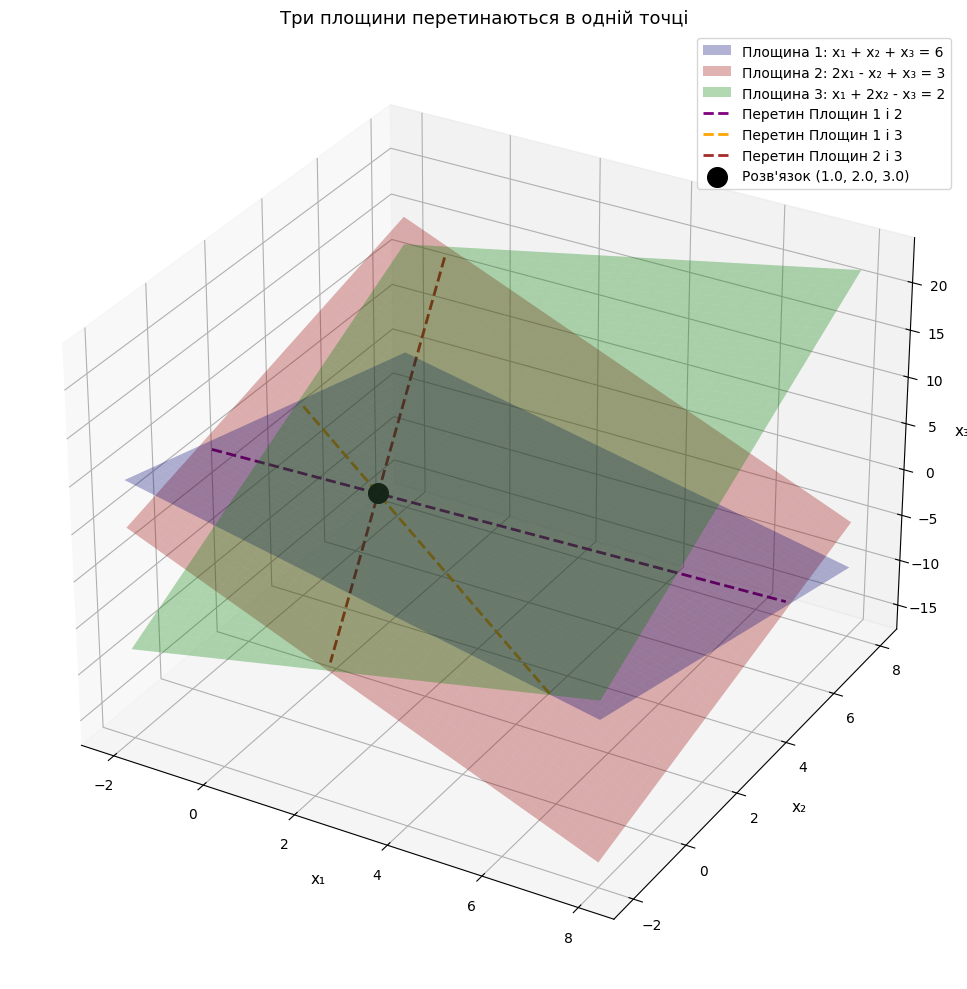

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Візуалізація трьох площин
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Створюємо сітку для малювання площин
# Повертаємо початковий діапазон для площин
x_range = np.linspace(-2, 8, 50)
y_range = np.linspace(-2, 8, 50)
X_grid, Y_grid = np.meshgrid(x_range, y_range)

# Перша площина: x₁ + x₂ + x₃ = 6  =>  x₃ = 6 - x₁ - x₂
Z1 = 6 - X_grid - Y_grid

# Друга площина: 2x₁ - x₂ + x₃ = 3  =>  x₃ = 3 - 2x₁ + x₂
Z2 = 3 - 2*X_grid + Y_grid

# Третя площина: x₁ + 2x₂ - x₃ = 2  =>  x₃ = x₁ + 2*Y_grid - 2

# Малюємо три площини з різними кольорами та прозорістю
ax.plot_surface(X_grid, Y_grid, Z1, alpha=0.3, color='blue', label='Площина 1: x₁ + x₂ + x₃ = 6')
ax.plot_surface(X_grid, Y_grid, Z2, alpha=0.3, color='red', label='Площина 2: 2x₁ - x₂ + x₃ = 3')
ax.plot_surface(X_grid, Y_grid, Z3, alpha=0.3, color='green', label='Площина 3: x₁ + 2x₂ - x₃ = 2')


# Додаємо лінії перетину між площинами
# Використовуємо той самий діапазон, що і для площин, для обрізки ліній
line_range_limit_x = (-2, 8)
line_range_limit_y = (-2, 8)

# Перетин Площини 1 і Площини 2:
# x₁ = 2x₂ - 3
# x₃ = 9 - 3x₂
y_line12 = np.linspace(-5, 10, 100) # Використовуємо ширший діапазон для обчислень
x_line12 = 2*y_line12 - 3
z_line12 = 9 - 3*y_line12

# Обрізаємо лінію за межами площин
mask12 = (x_line12 >= line_range_limit_x[0]) & (x_line12 <= line_range_limit_x[1]) & \
         (y_line12 >= line_range_limit_y[0]) & (y_line12 <= line_range_limit_y[1])
ax.plot(x_line12[mask12], y_line12[mask12], z_line12[mask12], color='purple', linewidth=2, linestyle='--', label='Перетин Площин 1 і 2')

# Перетин Площини 1 і Площини 3:
# x₁ = (8 - 3x₂) / 2
# x₃ = (4 + x₂) / 2
y_line13 = np.linspace(-5, 10, 100) # Використовуємо ширший діапазон для обчислень
x_line13 = (8 - 3*y_line13) / 2
z_line13 = (4 + y_line13) / 2

# Обрізаємо лінію за межами площин
mask13 = (x_line13 >= line_range_limit_x[0]) & (x_line13 <= line_range_limit_x[1]) & \
         (y_line13 >= line_range_limit_y[0]) & (y_line13 <= line_range_limit_y[1]) # Corrected typo here
ax.plot(x_line13[mask13], y_line13[mask13], z_line13[mask13], color='orange', linewidth=2, linestyle='--', label='Перетин Площин 1 і 3')


# Перетин Площини 2 і Площини 3:
# x₂ = 5 - 3x₁
# x₃ = 8 - 5x₁
x_line23 = np.linspace(-5, 10, 100) # Використовуємо ширший діапазон для обчислень
y_line23 = 5 - 3*x_line23
z_line23 = 8 - 5*x_line23

# Обрізаємо лінію за межами площин
mask23 = (x_line23 >= line_range_limit_x[0]) & (x_line23 <= line_range_limit_x[1]) & \
         (y_line23 >= line_range_limit_y[0]) & (y_line23 <= line_range_limit_y[1])
ax.plot(x_line23[mask23], y_line23[mask23], z_line23[mask23], color='brown', linewidth=2, linestyle='--', label='Перетин Площин 2 і 3')


# Малюємо точку розв'язку
ax.scatter([x_sol_3d[0]], [x_sol_3d[1]], [x_sol_3d[2]],
          color='black', s=200, marker='o',
          label=f'Розв\'язок ({x_sol_3d[0]:.1f}, {x_sol_3d[1]:.1f}, {x_sol_3d[2]:.1f})')

ax.set_xlabel('x₁', fontsize=11)
ax.set_ylabel('x₂', fontsize=11)
ax.set_zlabel('x₃', fontsize=11)
ax.set_title('Три площини перетинаються в одній точці', fontsize=13)
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

### Приклад 8. Чотиривимірна гіперплощина

In [ ]:
import numpy as np

# Система 4 рівняння, 4 невідомих
A_4d = np.array([
    [1, 2, -1, 3],
    [2, -1, 1, 1],
    [1, 1, 1, -1],
    [3, 1, -2, 2]
])
b_4d = np.array([5, 4, 6, 7])

# Розв'язуємо
x_sol_4d = np.linalg.solve(A_4d, b_4d)

print(f"\nРозв'язок:")
for i, val in enumerate(x_sol_4d, 1):
    print(f"  x_{i} = {val:.4f}")

# Перевірка розв'язку
residual = A_4d @ x_sol_4d - b_4d
print(f"\nПохибка: {np.linalg.norm(residual):.2e}")


Розв'язок:
  x_1 = 2.5455
  x_2 = 2.0909
  x_3 = 1.1818
  x_4 = -0.1818

Похибка: 8.88e-16


### Приклад 9. Аналіз систем

In [ ]:
import numpy as np

def analyze_system(A, b) -> dict:
    """
    Аналізує систему лінійних рівнянь Ax = b.

    Returns:
        dict: Словник з інформацією про ситуацію розв'язку:
            - 'compatible': bool - чи сумісна система
            - 'solution_type': 'unique' | 'infinite' | 'none'
            - 'case_description': str - опис випадку
            - 'rank_A': int - ранг матриці A
            - 'rank_Ab': int - ранг розширеної матриці [A|b]
            - 'n': int - кількість невідомих
            - 'm': int - кількість рівнянь
            - 'solution': Optional[np.ndarray] - розв'язок (якщо єдиний)
    """
    # Обчислюємо ранг матриці коефіцієнтів A
    rank_A = np.linalg.matrix_rank(A)

    # Створюємо розширену матрицю [A|b] і знаходимо її ранг
    rank_Ab = np.linalg.matrix_rank(np.column_stack([A, b]))

    # Кількість невідомих — це кількість стовпців у A
    n = A.shape[1]
    m = A.shape[0]  # кількість рівнянь

    result = {
        'rank_A': rank_A,
        'rank_Ab': rank_Ab,
        'n': n,
        'm': m,
        'compatible': False,
        'solution_type': 'none',
        'solution': None,
        'case_description': ''
    }

    # Порівнюємо ранги згідно з критерієм Кронекера–Капеллі
    if rank_A == rank_Ab:
        result['compatible'] = True

        if rank_A == n:
            # Якщо rank(A) = n, то розв'язок єдиний
            x = np.linalg.solve(A, b)
            result['solution_type'] = 'unique'
            result['solution'] = x
            result['case_description'] = 'Сумісна визначена система - єдиний розв\'язок'
        else:
            # Якщо rank(A) < n, то розв'язків безліч
            result['solution_type'] = 'infinite'
            result['case_description'] = 'Сумісна система - нескінченно багато розв\'язків'
    else:
        # Якщо rank(A) < rank([A|b]), система несумісна
        result['compatible'] = False
        result['solution_type'] = 'none'
        result['case_description'] = 'Несумісна система - розв\'язку немає'

    return result


In [ ]:
A1 = np.array([
    [2, 1, -1],
    [1, 3, 2],
    [3, -1, 1]
])
b1 = np.array([8, 13, 5])

result1 = analyze_system(A1, b1)
print(result1['case_description'])
if result1['solution'] is not None:
    print("x =", result1['solution'])
print()

Сумісна визначена система - єдиний розв'язок
x = [2.6 3.2 0.4]



In [ ]:
A2 = np.array([
    [1, 2],
    [2, 4]
])
b2 = np.array([3, 5])

result2 = analyze_system(A2, b2)
print(result2['case_description'])
if result2['solution'] is not None:
    print("x =", result2['solution'])
print()

Несумісна система - розв'язку немає



In [ ]:
A3 = np.array([
    [1, 2, 3],
    [2, 4, 6],
    [3, 6, 9]
])
b3 = np.array([4, 8, 12])

result3 = analyze_system(A3, b3)
print(result3['case_description'])
if result3['solution'] is not None:
    print("x =", result3['solution'])
print()

Сумісна система - нескінченно багато розв'язків



In [ ]:
A4 = np.array([
    [1, 2, 1],
    [2, 1, 3]
])
b4 = np.array([5, 8])

result4 = analyze_system(A4, b4)
print(result4['case_description'])
if result4['solution'] is not None:
    print("x =", result4['solution'])
print()

Сумісна система - нескінченно багато розв'язків



### Приклад 10. Обчислення визначника та оберненої матриці

In [ ]:
import numpy as np

A = np.array([
    [2, 1, -1],
    [1, 3, 2],
    [-1, 2, 1]
], dtype=float)

det_A = np.linalg.det(A)
print(f"\nВизначник det(A) = {det_A:.4f}")

if abs(det_A) > 1e-10:
    print("Обернена матриця існує")

    A_inv = np.linalg.inv(A)
    print("\nОбернена матриця:")
    print(A_inv)

    # Розв'язуємо систему
    b = np.array([8, 13, 5])
    x = A_inv @ b

    print(f"\nРозв'язок системи через обернену матрицю:")
    print(f"x = {x}")

    # Порівняємо з np.linalg.solve
    x_solve = np.linalg.solve(A, b)
    print(f"\nРозв'язок через np.linalg.solve:")
    print(f"x = {x_solve}")

    print(f"\nРізниця між методами: {np.linalg.norm(x - x_solve):.2e}")


Визначник det(A) = -10.0000
Обернена матриця існує

Обернена матриця:
[[ 0.1  0.3 -0.5]
 [ 0.3 -0.1  0.5]
 [-0.5  0.5 -0.5]]

Розв'язок системи через обернену матрицю:
x = [2.2 3.6 0. ]

Розв'язок через np.linalg.solve:
x = [ 2.2  3.6 -0. ]

Різниця між методами: 9.93e-16


### Приклад 11. Метод `np.linalg.solve()`, як оптимізована версія метода Гауса

In [ ]:
import numpy as np

# Визначаємо систему
A = np.array([
    [2, 1, -1],
    [-3, -1, 2],
    [-2, 1, 2]
], dtype=float)

b = np.array([8, -11, -3], dtype=float)

# Розв'язуємо систему
x = np.linalg.solve(A, b)

print(f"Розв'язок: x = {x}")

Розв'язок: x = [ 2.  3. -1.]


### Приклад 12. LU-розклад

In [ ]:
import numpy as np
from scipy import linalg

# Матриця системи
A = np.array([
    [2, 1, -1],
    [4, -1, 2],
    [-2, 2, 1]
], dtype=float)

# Обчислюємо LU-розклад один раз
P, L, U = linalg.lu(A)

print("Нижня трикутна матриця L:")
print(L)
print("\nВерхня трикутна матриця U:")
print(U)
print()

# Тепер можемо швидко розв'язувати системи для різних b
b = np.array([3, 13, 4], dtype=float)

print(f"Розв'язуємо Ax = b, де b = {b}")
print()

# Крок 1: Застосовуємо перестановку до b
Pb = P @ b
print(f"Після перестановки: Pb = {Pb}")

# Крок 2: Прямий хід - розв'язуємо Ly = Pb
y = linalg.solve_triangular(L, Pb, lower=True)
print(f"Після прямого ходу: y = {y}")

# Крок 3: Зворотний хід - розв'язуємо Ux = y
x = linalg.solve_triangular(U, y, lower=False)
print(f"Розв'язок: x = {x}")
print()

# Перевірка
print(f"Перевірка: Ax = {A @ x}")
print(f"Має дорівнювати b = {b}")

Нижня трикутна матриця L:
[[ 1.   0.   0. ]
 [ 0.5  1.   0. ]
 [-0.5  1.   1. ]]

Верхня трикутна матриця U:
[[ 4.  -1.   2. ]
 [ 0.   1.5 -2. ]
 [ 0.   0.   4. ]]

Розв'язуємо Ax = b, де b = [ 3. 13.  4.]

Після перестановки: Pb = [13.  3.  4.]
Після прямого ходу: y = [13.  -3.5 14. ]
Розв'язок: x = [2.08333333 2.33333333 3.5       ]

Перевірка: Ax = [ 3. 13.  4.]
Має дорівнювати b = [ 3. 13.  4.]


### Приклад 13. LU-розклад для багатьох систем

In [ ]:
import numpy as np
from scipy import linalg

A = np.array([[2, 1, -1], [4, -1, 2], [-2, 2, 1]], dtype=float)

# Обчислюємо LU-розклад один раз
P, L, U = linalg.lu(A)

# Розв'язуємо для п'яти різних правих частин
b_vectors = [
    np.array([3, 13, 4]),
    np.array([1, 5, 2]),
    np.array([0, 0, 1]),
    np.array([7, 3, -2]),
    np.array([2, 8, 5])
]

print("Розв'язуємо 5 систем з однією матрицею A:")
for i, b in enumerate(b_vectors, 1):
    Pb = P @ b
    y = linalg.solve_triangular(L, Pb, lower=True)
    x = linalg.solve_triangular(U, y, lower=False)
    print(f"Система {i}: b = {b}, x = {x}")

Розв'язуємо 5 систем з однією матрицею A:
Система 1: b = [ 3 13  4], x = [2.08333333 2.33333333 3.5       ]
Система 2: b = [1 5 2], x = [0.75 1.   1.5 ]
Система 3: b = [0 0 1], x = [-0.04166667  0.33333333  0.25      ]
Система 4: b = [ 7  3 -2], x = [ 1.91666667  1.66666667 -1.5       ]
Система 5: b = [2 8 5], x = [1.20833333 2.33333333 2.75      ]


### Приклад 14. Несумісна система $3 \times 2$

In [ ]:
import numpy as np

# Матриця A: кожен рядок - це [x_i, 1]
A = np.array([
    [1, 1],
    [2, 1],
    [3, 1]
], dtype=float)

# Вектор b: значення y_i
b = np.array([2, 3, 5], dtype=float)

print("Матриця A (3×2):")
print(A)
print(f"\nВектор b: {b}")

# Спроба розв'язати систему
try:
    x = np.linalg.solve(A, b)
    print(f"\nРозв'язок: {x}")
except np.linalg.LinAlgError as e:
    print(f"\nПомилка бо матриця не квадратна: {e}")
    print("Система не має точного розв'язку")

Матриця A (3×2):
[[1. 1.]
 [2. 1.]
 [3. 1.]]

Вектор b: [2. 3. 5.]

Помилка бо матриця не квадратна: Last 2 dimensions of the array must be square
Система не має точного розв'язку


### Приклад 15. Візуалізація точок системи

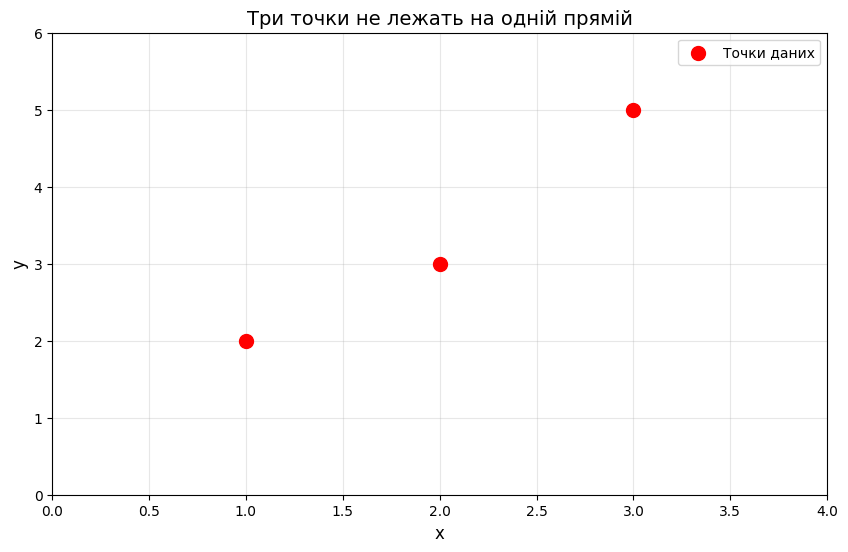

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_points = np.array([1, 2, 3])
y_points = np.array([2, 3, 5])

plt.figure(figsize=(10, 6))
plt.scatter(x_points, y_points, color='red', s=100, zorder=3, label='Точки даних')
plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Три точки не лежать на одній прямій', fontsize=14)
plt.legend()
plt.xlim(0, 4)
plt.ylim(0, 6)
plt.show()

### Приклад 16. Візуалізація довільної прямої та точок системи

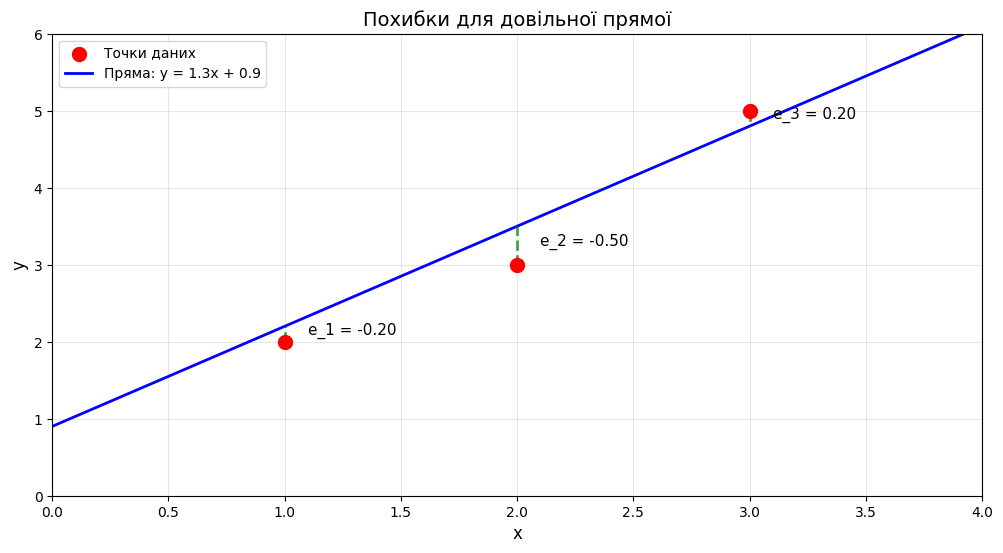

Похибки для кожної точки:
  Точка 1: e_1 = 2 - 2.20 = -0.20
  Точка 2: e_2 = 3 - 3.50 = -0.50
  Точка 3: e_3 = 5 - 4.80 = 0.20

Сума квадратів похибок: 0.33


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_points = np.array([1, 2, 3])
y_points = np.array([2, 3, 5])

# Довільна пряма
a_test = 1.3
b_test = 0.9

# Обчислюємо похибки
x_line = np.linspace(0, 4, 100)
y_line = a_test * x_line + b_test

plt.figure(figsize=(12, 6))
plt.scatter(x_points, y_points, color='red', s=100, zorder=3, label='Точки даних')
plt.plot(x_line, y_line, 'b-', linewidth=2, label=f'Пряма: y = {a_test}x + {b_test}')

# Малюємо ВЕРТИКАЛЬНІ лінії від точок до прямої.
# У методі найменших квадратів мінімізується сума квадратів саме цих ВЕРТИКАЛЬНИХ похибок.
for i in range(len(x_points)):
    y_on_line = a_test * x_points[i] + b_test
    error = y_points[i] - y_on_line # Це вертикальна похибка (залишком)
    plt.plot([x_points[i], x_points[i]], [y_points[i], y_on_line],
             'g--', linewidth=2, alpha=0.7)
    plt.text(x_points[i] + 0.1, (y_points[i] + y_on_line) / 2,
             f'e_{i+1} = {error:.2f}', fontsize=11)

plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Вертикальні похибки для довільної прямої (метод найменших квадратів)', fontsize=14)
plt.legend()
plt.xlim(0, 4)
plt.ylim(0, 6)
plt.show()

# Виводимо похибки (залишки)
print("Вертикальні похибки (залишки) для кожної точки:")
for i in range(len(x_points)):
    y_pred = a_test * x_points[i] + b_test
    error = y_points[i] - y_pred
    print(f"  Точка {i+1}: e_{i+1} = {y_points[i]} - {y_pred:.2f} = {error:.2f}")

errors = y_points - (a_test * x_points + b_test)
sum_squared_errors = np.sum(errors**2)
print(f"\nСума квадратів вертикальних похибок: {sum_squared_errors:.2f}")

### Приклад 17. МНК як проєкція на підпростір стовпців

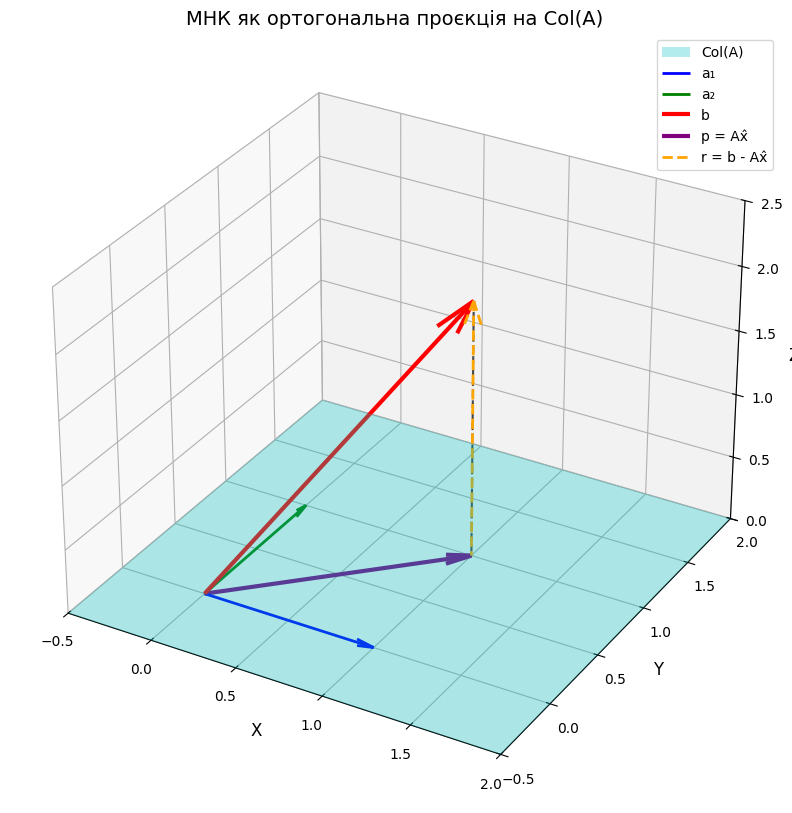

Вектор b: [1. 1. 2.]
Проєкція p = Ax̂: [1. 1. 0.]
Вектор похибки r: [0. 0. 2.]

Перевірка ортогональності A^T r:
[0. 0.]
(має бути близько до нуля)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Створюємо матрицю A: два стовпці в R^3
# Стовпці визначають площину (підпростір стовпців)
A = np.array([
    [1, 0],
    [0, 1],
    [0, 0]
], dtype=float)

# Вектор b поза площиною
b = np.array([1, 1, 2], dtype=float)

# Знаходимо проєкцію методом найменших квадратів
x_hat = np.linalg.lstsq(A, b, rcond=None)[0]
p = A @ x_hat  # Проєкція b на Col(A)
r = b - p      # Вектор похибки

# Візуалізація
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Площина Col(A) - підпростір стовпців
xx, yy = np.meshgrid(np.linspace(-0.5, 2, 10), np.linspace(-0.5, 2, 10))
zz = np.zeros_like(xx)
ax.plot_surface(xx, yy, zz, alpha=0.3, color='cyan', label='Col(A)')

# Стовпці матриці A
origin = np.array([0, 0, 0])
ax.quiver(*origin, *A[:, 0], color='blue', arrow_length_ratio=0.1, linewidth=2, label='a₁')
ax.quiver(*origin, *A[:, 1], color='green', arrow_length_ratio=0.1, linewidth=2, label='a₂')

# Вектор b
ax.quiver(*origin, *b, color='red', arrow_length_ratio=0.1, linewidth=3, label='b')

# Проєкція p
ax.quiver(*origin, *p, color='purple', arrow_length_ratio=0.1, linewidth=3, label='p = Ax̂')

# Вектор похибки r
ax.quiver(*p, *(b - p), color='orange', arrow_length_ratio=0.1, linewidth=2, linestyle='--', label='r = b - Ax̂')

# Лінія від b до p (показує ортогональність)
ax.plot([b[0], p[0]], [b[1], p[1]], [b[2], p[2]], 'k--', linewidth=1.5, alpha=0.7)

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.set_title('МНК як ортогональна проєкція на Col(A)', fontsize=14)
ax.legend(fontsize=10)
ax.set_xlim([-0.5, 2])
ax.set_ylim([-0.5, 2])
ax.set_zlim([0, 2.5])

plt.show()

print(f"Вектор b: {b}")
print(f"Проєкція p = Ax̂: {p}")
print(f"Вектор похибки r: {r}")
print(f"\nПеревірка ортогональності A^T r:")
print(A.T @ r)
print("(має бути близько до нуля)")

### Приклад 18. МНК

In [ ]:
import numpy as np

A = np.array([
    [1, 1],
    [2, 1],
    [3, 1]
], dtype=float)

b = np.array([2, 3, 5], dtype=float)

# Розв'язуємо методом найменших квадратів
result = np.linalg.lstsq(A, b, rcond=None)

x_hat = result[0]
residuals = result[1]

print(f"Розв'язок {x_hat}")
print(f"\nСума квадратів похибок: {residuals[0]:.6f}")

Розв'язок x̂ = [1.5        0.33333333]

Сума квадратів похибок: 0.166667


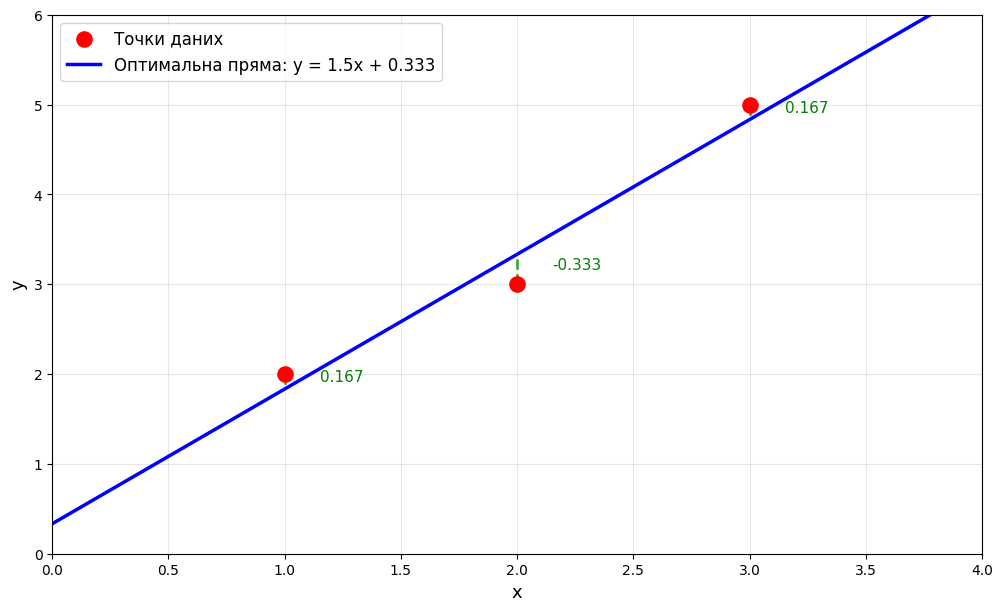

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_points = np.array([1, 2, 3])
y_points = np.array([2, 3, 5])

A = np.array([
    [1, 1],
    [2, 1],
    [3, 1]
], dtype=float)

b = y_points

x_hat = np.linalg.lstsq(A, b, rcond=None)[0]
a_opt, b_opt = x_hat[0], x_hat[1]

x_line = np.linspace(0, 4, 100)
y_line = a_opt * x_line + b_opt

plt.figure(figsize=(12, 7))
plt.scatter(x_points, y_points, color='red', s=120, zorder=3, label='Точки даних')
plt.plot(x_line, y_line, 'b-', linewidth=2.5,
         label=f'Оптимальна пряма: y = {round(a_opt, 1)}x + {b_opt:.3f}')

for i in range(len(x_points)):
    y_on_line = a_opt * x_points[i] + b_opt
    error = y_points[i] - y_on_line
    plt.plot([x_points[i], x_points[i]], [y_points[i], y_on_line],
             'g--', linewidth=2, alpha=0.7)
    mid_y = (y_points[i] + y_on_line) / 2
    plt.text(x_points[i] + 0.15, mid_y, f'{error:.3f}', fontsize=11, color='green')

plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
# plt.title('Метод найменших квадратів', fontsize=15)
plt.legend(fontsize=12)
plt.xlim(0, 4)
plt.ylim(0, 6)
plt.show()

### Приклад 19. Лінійна регресія як застосування МНК

Спочатку згенеруємо дані

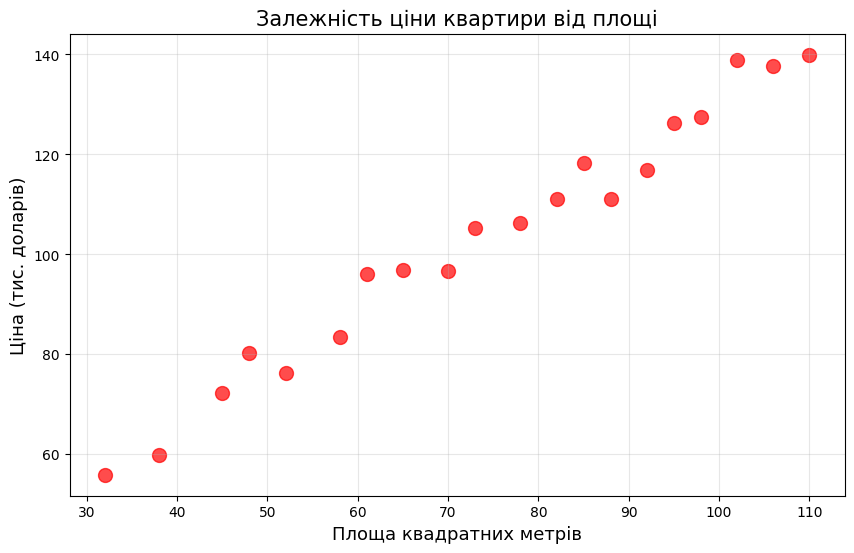

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Дані про квартири
np.random.seed(42)
area = np.array([32, 38, 45, 48, 52, 58, 61, 65, 70, 73,
                 78, 82, 85, 88, 92, 95, 98, 102, 106, 110])

# Базова залежність: ціна ≈ 1.2 * площа + 15, плюс шум
price = 1.2 * area + 15 + np.random.normal(0, 5, size=len(area))

plt.figure(figsize=(10, 6))
plt.scatter(area, price, color='red', s=100, alpha=0.7, )
plt.grid(True, alpha=0.3)
plt.xlabel('Площа квадратних метрів', fontsize=13)
plt.ylabel('Ціна (тис. доларів)', fontsize=13)
plt.title('Залежність ціни квартири від площі', fontsize=15)
plt.show()

Побудуємо матрицю $A$ та вектор $\mathbf{b}$ для МНК

In [ ]:
# Матриця A: перший стовпець - площа, другий - одиниці
A = np.column_stack([area, np.ones(len(area))])

b = price

print(f"Матриця A: {A}")
print(f"\nРозмір матриці A: {A.shape}")
print(f"Розмір вектора b: {b.shape}")

Матриця A: [[ 32.   1.]
 [ 38.   1.]
 [ 45.   1.]
 [ 48.   1.]
 [ 52.   1.]
 [ 58.   1.]
 [ 61.   1.]
 [ 65.   1.]
 [ 70.   1.]
 [ 73.   1.]
 [ 78.   1.]
 [ 82.   1.]
 [ 85.   1.]
 [ 88.   1.]
 [ 92.   1.]
 [ 95.   1.]
 [ 98.   1.]
 [102.   1.]
 [106.   1.]
 [110.   1.]]

Розмір матриці A: (20, 2)
Розмір вектора b: (20,)


Розв'язуємо МНК

In [ ]:

result = np.linalg.lstsq(A, b)
x_hat = result[0]
residuals = result[1]

a_opt = x_hat[0]
b_opt = x_hat[1]

print(f"Оптимальні параметри:")
print(f"  a (коефіцієнт нахилу) = {a_opt:.4f} тис. дол./кв. м")
print(f"  b (зсув) = {b_opt:.4f} тис. дол.")

Оптимальні параметри:
  a (коефіцієнт нахилу) = 1.0754 тис. дол./кв. м
  b (зсув) = 23.3504 тис. дол.


Обчислимо похибки для оцінки якості моделі

In [ ]:
# Передбачення моделі
predictions = A @ x_hat

# Похибки
errors = b - predictions

print("Статистика похибок:")
print(f"  Середня абсолютна похибка: {np.mean(np.abs(errors)):.2f} тис. дол.")
print(f"  Максимальна похибка: {np.max(np.abs(errors)):.2f} тис. дол.")
print(f"  Стандартне відхилення похибок: {np.std(errors):.2f} тис. дол.")

Статистика похибок:
  Середня абсолютна похибка: 3.03 тис. $
  Максимальна похибка: 7.15 тис. $
  Стандартне відхилення похибок: 3.71 тис. $


Візуалізуємо результат

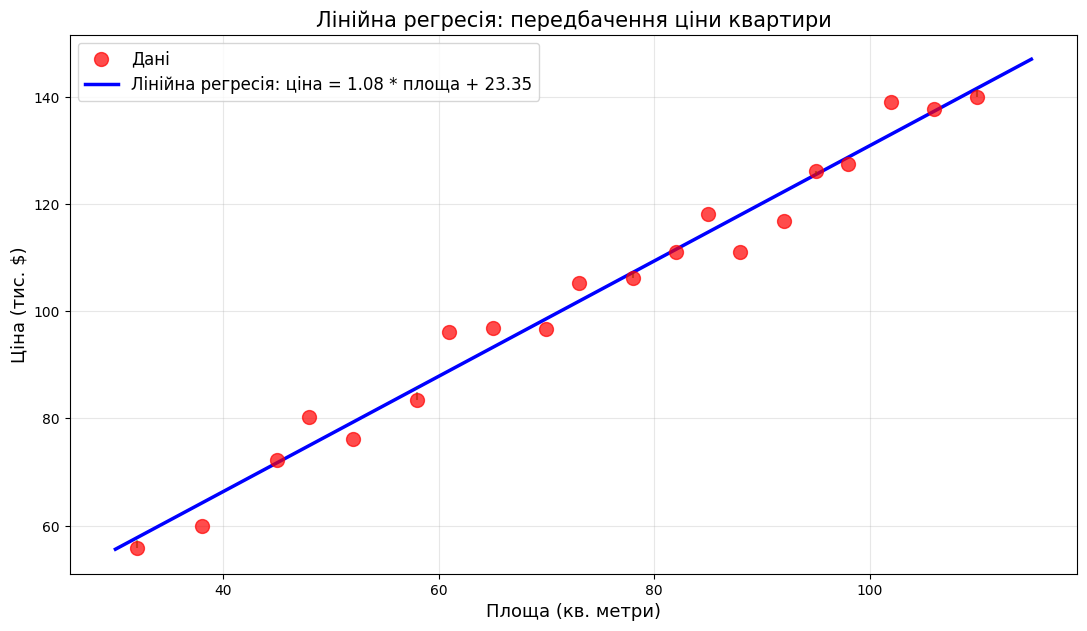

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Будуємо пряму регресії
area_line = np.linspace(30, 115, 100)
price_line = a_opt * area_line + b_opt

plt.figure(figsize=(13, 7))

# Дані
plt.scatter(area, price, color='red', s=100, zorder=3, alpha=0.7, label='Дані')

# Лінія регресії
plt.plot(area_line, price_line, 'b-', linewidth=2.5,
         label=f'Лінійна регресія: ціна = {a_opt:.2f} * площа + {b_opt:.2f}')

# Похибки для кількох точок (щоб не захаращувати)
for i in [0, 5, 10, 15, 19]:
    pred = a_opt * area[i] + b_opt
    plt.plot([area[i], area[i]], [price[i], pred],
             'g--', linewidth=1.5, alpha=0.6)

plt.grid(True, alpha=0.3)
plt.xlabel('Площа (кв. метри)', fontsize=13)
plt.ylabel('Ціна (тис. $)', fontsize=13)
plt.title('Лінійна регресія: передбачення ціни квартири', fontsize=15)
plt.legend(fontsize=12)
plt.show()

Передбачення для нових даних

In [ ]:
import numpy as np

area_new = 75
price_predicted = a_opt * area_new + b_opt

print(f"Передбачення для квартири площею {area_new} кв.м²:")
print(f"  Очікувана ціна: {price_predicted:.2f} тис. дол.")

Передбачення для квартири площею 75 м²:
  Очікувана ціна: 104.01 тис. $


### Приклад 20. Геометричний зміст власних векторів

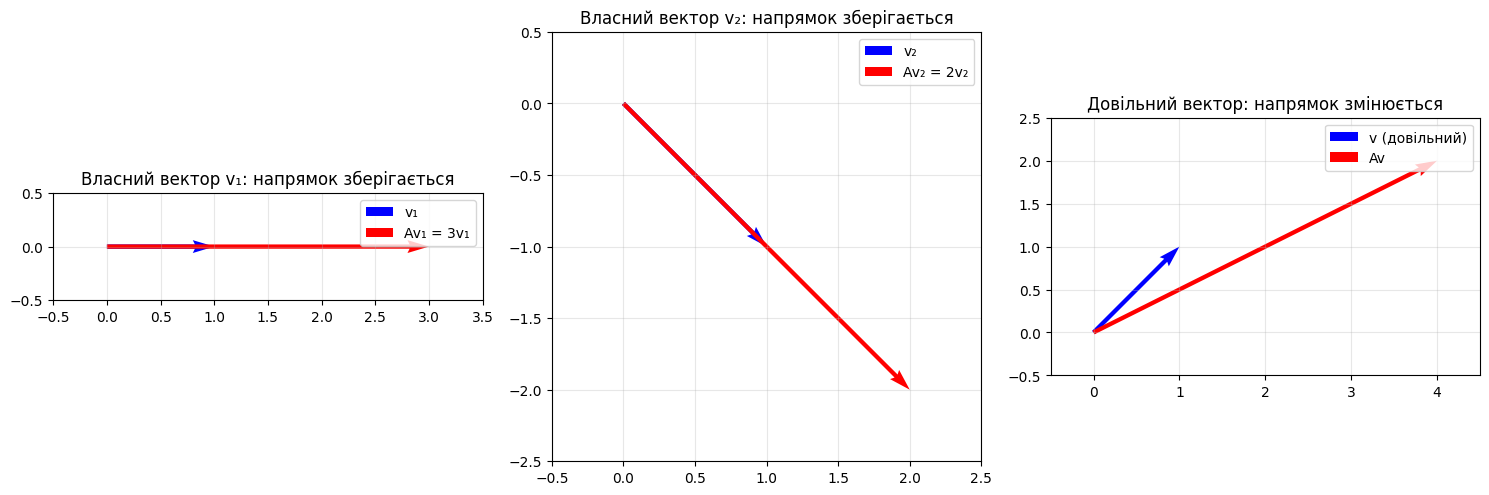

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[3, 1], [0, 2]])

# Власні вектори
v1 = np.array([1, 0])
v2 = np.array([1, -1])

# Результати множення
Av1 = A @ v1
Av2 = A @ v2

# Довільний вектор (не власний)
v_other = np.array([1, 1])
Av_other = A @ v_other

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Перший власний вектор
ax1 = axes[0]
ax1.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1,
           color='blue', width=0.01, label='v₁')
ax1.quiver(0, 0, Av1[0], Av1[1], angles='xy', scale_units='xy', scale=1,
           color='red', width=0.01, label='Av₁ = 3v₁')
ax1.set_xlim(-0.5, 3.5)
ax1.set_ylim(-0.5, 0.5)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_title('Власний вектор v₁: напрямок зберігається', fontsize=12)

# Другий власний вектор
ax2 = axes[1]
ax2.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1,
           color='blue', width=0.01, label='v₂')
ax2.quiver(0, 0, Av2[0], Av2[1], angles='xy', scale_units='xy', scale=1,
           color='red', width=0.01, label='Av₂ = 2v₂')
ax2.set_xlim(-0.5, 2.5)
ax2.set_ylim(-2.5, 0.5)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_title('Власний вектор v₂: напрямок зберігається', fontsize=12)

# Довільний вектор
ax3 = axes[2]
ax3.quiver(0, 0, v_other[0], v_other[1], angles='xy', scale_units='xy', scale=1,
           color='blue', width=0.01, label='v (довільний)')
ax3.quiver(0, 0, Av_other[0], Av_other[1], angles='xy', scale_units='xy', scale=1,
           color='red', width=0.01, label='Av')
ax3.set_xlim(-0.5, 4.5)
ax3.set_ylim(-0.5, 2.5)
ax3.set_aspect('equal')
ax3.grid(True, alpha=0.3)
ax3.legend()
ax3.set_title('Довільний вектор: напрямок змінюється', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

A = np.array([[3, 1], [0, 2]], dtype=float)

# Обчислюємо власні значення та власні вектори
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Власні значення λ:")
print(eigenvalues)
print("\nВласні вектори (стовпці матриці):")
print(eigenvectors)

# Перевірка для першого власного вектора
v1 = eigenvectors[:, 0]
lambda1 = eigenvalues[0]

Av1 = A @ v1
lambda_v1 = lambda1 * v1

print(f"\nПеревірка першого власного вектора:")
print(f"A @ v₁ = {Av1}")
print(f"λ₁ * v₁ = {lambda_v1}")
print(f"Різниця: {np.linalg.norm(Av1 - lambda_v1):.10f}")

Власні значення λ:
[3. 2.]

Власні вектори (стовпці матриці):
[[ 1.         -0.70710678]
 [ 0.          0.70710678]]

Перевірка першого власного вектора:
A @ v₁ = [3. 0.]
λ₁ * v₁ = [3. 0.]
Різниця: 0.0000000000


### Приклад 21. Обчислюємо власні значення та власні вектори

In [ ]:
import numpy as np

A = np.array([[3, 1], [0, 2]], dtype=float)

# Обчислюємо власні значення та власні вектори
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Власні значення λ:")
print(eigenvalues)
print("\nВласні вектори (стовпці матриці):")
print(eigenvectors)

Власні значення λ:
[3. 2.]

Власні вектори (стовпці матриці):
[[ 1.         -0.70710678]
 [ 0.          0.70710678]]


### Приклад 22. Власні значення матриці  $2 \times 2$

In [ ]:
import numpy as np

A = np.array([[2, 1], [1, 2]], dtype=float)

eigenvalues, eigenvectors = np.linalg.eig(A)

print("Власні значення:")
print(eigenvalues)
print("\nВласні вектори:")
print(eigenvectors)

v1 = eigenvectors[:, 0] # Перший стовпець
v2 = eigenvectors[:, 1] # Другий стовпець
lambda1 = eigenvalues[0]
lambda2 = eigenvalues[1]

print(f"\nλ₁ = {lambda1:.4f}, v₁ = [{v1[0]:.4f}, {v1[1]:.4f}]")
print(f"λ₂ = {lambda2:.4f}, v₂ = [{v2[0]:.4f}, {v2[1]:.4f}]")

Власні значення:
[3. 1.]

Власні вектори:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

λ₁ = 3.0000, v₁ = [0.7071, 0.7071]
λ₂ = 1.0000, v₂ = [-0.7071, 0.7071]


### Приклад 23. Візуалізуємо, як матриця діє на одиничне коло.

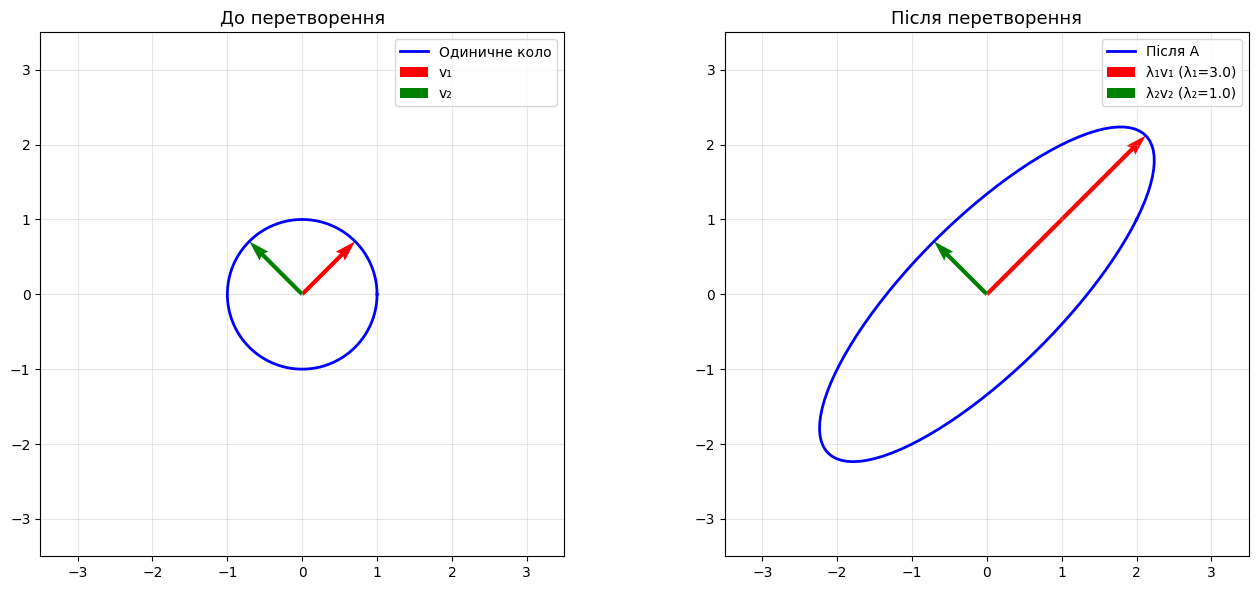

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[2, 1], [1, 2]], dtype=float)

# Створюємо 100 векторів одиничної довжини (точки на колі)
theta = np.linspace(0, 2*np.pi, 100)
circle = np.array([np.cos(theta), np.sin(theta)])

# Застосовуємо матрицю A до всіх векторів
ellipse = A @ circle

# Власні вектори
eigenvalues, eigenvectors = np.linalg.eig(A)
v1 = eigenvectors[:, 0]
v2 = eigenvectors[:, 1]
lambda1 = eigenvalues[0]
lambda2 = eigenvalues[1]

# Масштабовані власні вектори
v1_scaled = lambda1 * v1
v2_scaled = lambda2 * v2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Ліворуч: вихідне коло
ax1.plot(circle[0], circle[1], 'b-', linewidth=2, label='Одиничне коло')
ax1.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1,
           color='red', width=0.008, label='v₁')
ax1.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1,
           color='green', width=0.008, label='v₂')
ax1.set_xlim(-3.5, 3.5)
ax1.set_ylim(-3.5, 3.5)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_title('До перетворення', fontsize=13)

# Праворуч: після множення на A
ax2.plot(ellipse[0], ellipse[1], 'b-', linewidth=2, label='Після A')
ax2.quiver(0, 0, v1_scaled[0], v1_scaled[1], angles='xy', scale_units='xy', scale=1,
           color='red', width=0.008, label=f'λ₁v₁ (λ₁={lambda1:.1f})')
ax2.quiver(0, 0, v2_scaled[0], v2_scaled[1], angles='xy', scale_units='xy', scale=1,
           color='green', width=0.008, label=f'λ₂v₂ (λ₂={lambda2:.1f})')
ax2.set_xlim(-3.5, 3.5)
ax2.set_ylim(-3.5, 3.5)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_title('Після перетворення', fontsize=13)

plt.tight_layout()
plt.show()

Приклад 24. Власні значення  матриці обертання на $90^{\circ}$ проти годинникової стрілки

In [ ]:
import numpy as np

R = np.array([[0, -1], [1, 0]], dtype=complex)

eigenvalues, eigenvectors = np.linalg.eig(R)

print("Власні значення:")
print(eigenvalues)
print("\nВласні вектори:")
print(eigenvectors)

Власні значення:
[0.00000000e+00+1.j 2.77555756e-17-1.j]

Власні вектори:
[[ 7.07106781e-01+0.j          7.07106781e-01+0.j        ]
 [-0.00000000e+00-0.70710678j -1.66533454e-16+0.70710678j]]


### Приклад 24. Перевірка теоретичних обчислень власних значень

In [ ]:
import numpy as np

A = np.array([[3, 1], [0, 2]], dtype=float)

eigenvalues, eigenvectors = np.linalg.eig(A)

print(f"Власні значення: {eigenvalues}")

Власні значення: [3. 2.]
[[ 1.         -0.70710678]
 [ 0.          0.70710678]]


### Приклад 25. Перевірка теоретичних обчислень власних векторів

In [ ]:
import numpy as np

A = np.array([[3, 1], [0, 2]], dtype=float)

v1 = np.array([1, 0])
v2 = np.array([1, -1])

lambda1 = 3
lambda2 = 2

print("Перевірка першого власного вектора:")
print(f"A @ v₁ = {A @ v1}")
print(f"λ₁ * v₁ = {lambda1 * v1}")

print("\nПеревірка другого власного вектора:")
print(f"A @ v₂ = {A @ v2}")
print(f"λ₂ * v₂ = {lambda2 * v2}")

Перевірка першого власного вектора:
A @ v₁ = [3. 0.]
λ₁ * v₁ = [3 0]

Перевірка другого власного вектора:
A @ v₂ = [ 2. -2.]
λ₂ * v₂ = [ 2 -2]


### Приклад 26. Особливості розрахунку власних векторів

In [ ]:
import numpy as np

A = np.array([[3, 1], [0, 2]], dtype=float)

eigenvalues, eigenvectors = np.linalg.eig(A)

print("\nВласні вектори:")
print(eigenvectors)


Власні вектори:
[[ 1.         -0.70710678]
 [ 0.          0.70710678]]
